In [76]:
!pip install yfinance
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## **Question 1 & 3, Use the yfinance to Extract stock Data**   

In [85]:
tesla = yf.Ticker("TSLA")

In [89]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True) 

In [90]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [92]:
gamestop = yf.Ticker("GME")

In [93]:
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

In [94]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## **Question 2 & 4, Use webscraping to Extract revenue Data**

In [54]:
tsla_url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"

In [73]:
data_tsla = requests.get(tsla_url)
soup = BeautifulSoup(data_tsla.text, 'html.parser')

tesla_revenue = []
for row in soup.find_all('YOUR_REVENUE_ROW_SELECTOR'):
    columns = row.find_all('YOUR_REVENUE_COLUMN_SELECTOR')
    date = columns[0].text
    revenue = columns[1].text
    tesla_revenue.append([date, revenue])

tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=['Date', 'Revenue'])
tesla_revenue_df.head()


,Date,Revenue


In [79]:
gme_url = "https://finance.yahoo.com/quote/GME/financials/"
data_gme = requests.get(gme_url)

soup = BeautifulSoup(data_gme.text, 'html.parser')

gamestop_revenue = []
for row in soup.find_all('YOUR_REVENUE_ROW_SELECTOR'):
    columns = row.find_all('YOUR_REVENUE_COLUMN_SELECTOR')
    date = columns[0].text
    revenue = columns[1].text
    gme_revenue.append([date, revenue])

gme_revenue_df = pd.DataFrame(gamestop_revenue, columns=['Date', 'Revenue'])
gme_revenue_df.head()

,Date,Revenue


## **Question 5**

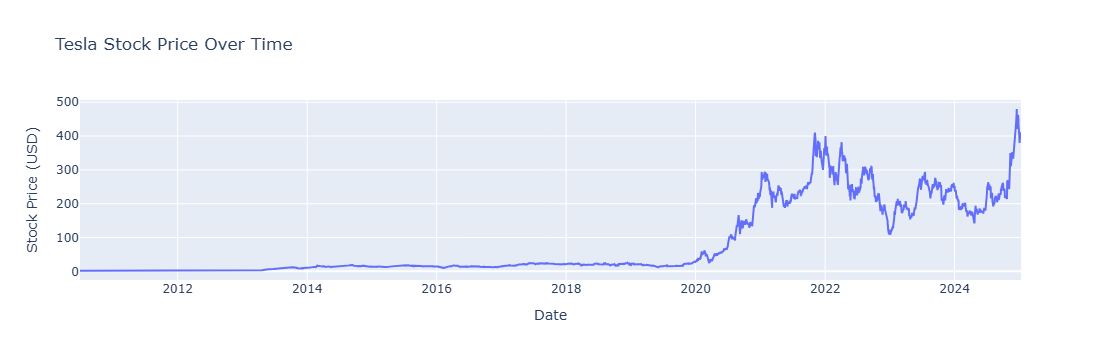

In [96]:
def make_graph(data, title):
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], mode='lines', name='Stock Price'))
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Stock Price (USD)')
    fig.show()

make_graph(tesla_data, 'Tesla Stock Price Over Time')

## **Question 6**

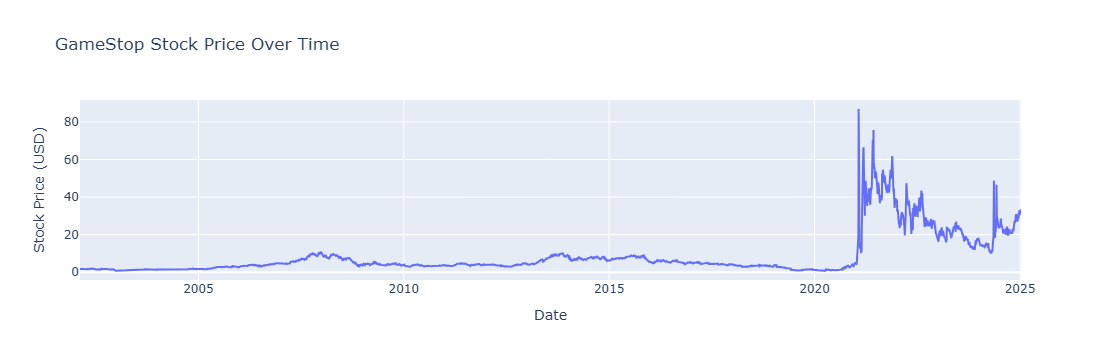

In [99]:
def make_graph(data, title):
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Stock Price'))
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Stock Price (USD)')
    fig.show()
make_graph(gme_data, 'GameStop Stock Price Over Time')